# About Titanic 

On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.

Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

<b>Objective:-</b>In this challenge, we are going to complete the analysis of what sorts of people were likely to survive.

In [10]:
#importing libraries
%matplotlib inline
import os 
import pandas as pd  #data analysis
import numpy as np #scientific computation
import seaborn as sns #ploting tool
sns.set(style='white', context='notebook', palette='deep')
import matplotlib.pyplot as plt #ploting tool

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
# importing data

train_df = pd.read_csv("C:/users/rock/Documents/train.csv")

test_df = pd.read_csv("C:/users/rock/Documents/test.csv")

In [5]:
train_df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [7]:
train_df.shape

(891, 12)

In [8]:
test_df.shape

(418, 11)

Here we have 891 row and 12 columns in our train data set 

In test data set we have 418 rows and 11 columns

# <b>About dataset</b>
class is the Ticket-class: first (1), second (2), and third (3) class tickets were used. This is an ordinal integer feature.

Name is the name of the passenger. The names also contain titles and some persons might share the same surname; indicating family relations. We know that some titles can indicate a certain age group. For instance Master is a boy while Mr is a man. This feature is a character string of variable length but similar format.

<b>Survived</b> 1:-survived,0:-Dead
<b>Sex</b> is an indicator whether the passenger was female or male. This is a categorical text string feature.

<b>Age</b> is the integer age of the passenger. There are NaN values in this column.

<b>SibSp</b> is another ordinal integer feature describing the number of siblings or spouses travelling with each passenger.

<b>Parch</b> is another ordinal integer features that gives the number of parents or children travelling with each passenger.

<b>Ticket</b> is a character string of variable length that gives the ticket number.

<b>Fare</b> is a float feature showing how much each passenger paid for their rather memorable journey.

<b>Cabin</b> gives the cabin number of each passenger. There are NaN in this column. This is mixed datatype.

<b>Embarked</b> shows the port of embarkation as a categorical character value.

Want to Know more About titanic :-http://campus.lakeforest.edu/frank/FILES/MLFfiles/Bio150/Titanic/TitanicMETA.pdf

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Exploratory Data Analysis

In [18]:
train_df.describe(include=["O"]) #describing wole data set

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [19]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Here you can see by just one function we can observe that

38% survival rate is observed 

Age,Embarked are missing values

people aged with 0.4 yrs to 80 yrs

People from embarked S are high 

some tickets are overlapped and some people sharing the same cabin 

Fares varied significantly with few passengers (1%) paying as high as $512



In [13]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [130]:
#here im creating a bar hcart function to look at all the varaibles 

def barchart(columns):
    survived = train_df[train_df['Survived']==1][columns].value_counts() 
    dead =train_df[train_df["Survived"]==0][columns].value_counts()
    df_SD = pd.DataFrame([survived,dead])
    df_SD.index =["Survived","Dead"] 
    df_SD.plot(kind='bar',stacked=True, figsize=(10,5))
  

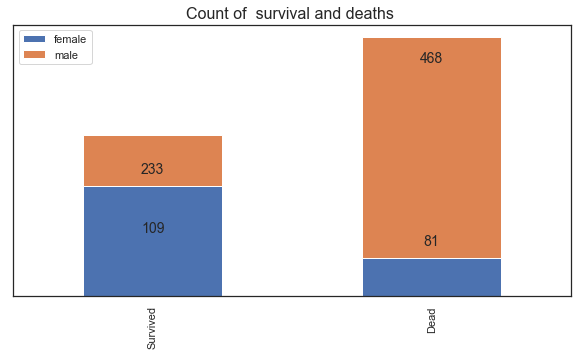

In [128]:
#bar chart for sex

barchart("Sex")


Here you can see that females surviva rate is high then menthus men are more likely to die 


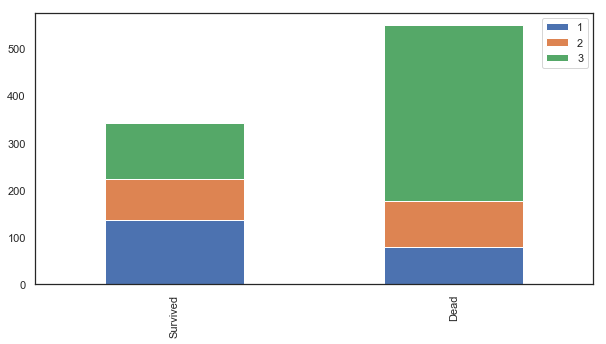

In [131]:
barchart("Pclass")

Here you can see that class1 means rich class people survival rate is high compartive to other two classes 

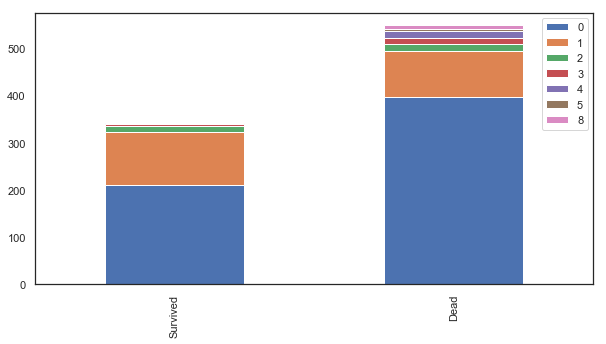

In [132]:
barchart("SibSp")

Here you Yo can see people with more than 2 are more likely to suvive while people person with zero sbisp are more likely to die

In above plot its a bit confusing to distinguish the relations i will plot a another factor plot

In [133]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)

In [134]:
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


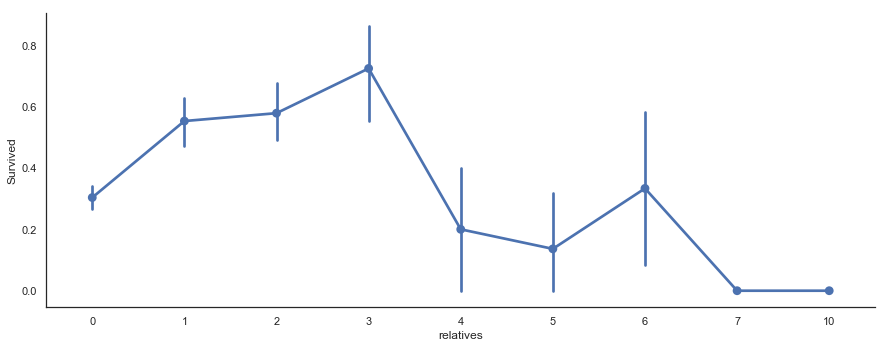

In [135]:
sns.factorplot('relatives','Survived', 
                      data=train_df, aspect = 2.5, )

Here you can clearly see that person with 1-3 relatives are more likely to survive

Here you can also observe that person with less than one and more than 3 is likely to die 

# Data Preprocessing:-

<b>Data Cleaning </b> basically means removing the false and duplicate entries from the original data .This is the most important step in Machine learning Becoz our data consists of lots of misleading and duplicate entries if we give this data to our algorthim it will loose its accuracy.So for better output we clean Data Everytime when we are dealing with a data set

After cleaning data we do some feature engineering steps to feed the data to our algorithm

We here convert some categorical features to numerical feature vector to feed our algorithm .ML models takes numerical data to train the model .we cant use categorical data to feed our model.So feature engineering is the most important step

In [136]:
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
relatives        0
not_alone        0
dtype: int64


Here we have missing values of:-

age:-177

cabin =687

embarked = 2

Knowing about missing values is important because they indicate how much we don't know about our data. Making inferences based on just a few cases is often unwise. In addition, many modelling procedures break down when missing values are involved and the corresponding rows will either have to be removed completely or the values need to be estimated somehow.

Here we have to deal with many features both numerical and categorical 

Why cabin Feature is Important?

In my previous practice %notebook i have dropped the cabin column coz of missing values and i later realized cabin also a important feature to our model.lets see how

I have refered to many notebooks why people are using cabin feature and i have figured it why?

In cabin feature we can see that it consists of a letter followed by numerical values. Actually the letter representing the deck f the boat where cabin is located by followed by the room number From this cabin feature if we knew the section of the boat where a person was staying. this would leads to predict the chance of survival of the person.for this reason cabin is also considered as a important feature.



In [139]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

In [146]:
# for understanding re https://www.ntu.edu.sg/home/ehchua/programming/howto/Regexe.html
import re
deck = {"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,'G':7,'U':8} #CREATING A DICTIONARY AND ASSIGINING A DECK VALUE 
data =[train_df,test_df]

for dataset in data:
    dataset["Cabin"] =dataset["Cabin"].fillna("U0") #filling the misiing values to zero
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())#extrating cat vairbales
    dataset['Deck'] = dataset['Deck'].map(deck) #creating deck feature
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int) #coverting to numerical
    

train_df=train_df.drop(["Cabin"],axis=1) #dropping cabin col from train data
test_df =test_df.drop(["Cabin"],axis=1) #dropping cabin col form test data


In [147]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,3


In [152]:
train_df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,3


now we have to convert sex,name,fare emabarked columns

<b>Embarked

In [154]:
train_df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [157]:
train_df["Embarked"].isnull().sum()

2

Here we have two missing embarked values here majority calss is S so i am giving S to those null values

In [165]:
common_value = 'S'
ports = {"S": 0, "C": 1, "Q": 2}
data =[train_df,test_df]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [174]:
train_df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0,0,1,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71,1,1,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,0,0,0,1,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53,0,1,0,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,1,0,0,1,8


<b>Fare

we have fare rate as flot64 and we are converting to int and binning on basis of fare rate so that to minimize the distance

In [177]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)
    dataset.loc[dataset["Fare"]<=7,"Fare"]=0
    dataset.loc[(dataset["Fare"]>7)&(dataset["Fare"]<=14),"Fare"]=1
    dataset.loc[(dataset["Fare"]>14)&(dataset["Fare"]<=31),"Fare"] =2
    dataset.loc[(dataset["Fare"]>31)&(dataset["Fare"]<=91),"Fare"]=3
    dataset.loc[(dataset["Fare"]>91)&(dataset["Fare"]<=250),"Fare"]=4
    dataset.loc[dataset["Fare"]>250,"Fare" ] =5

In [178]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0,0,1,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,3,1,1,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,0,0,0,1,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3,0,1,0,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,0,0,0,1,8


In [180]:
train_df = train_df.drop(["Ticket"],axis=1) 
test_df = test_df.drop(["Ticket"],axis=1)

In [181]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,0,0,1,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,3,1,1,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,0,0,0,1,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,3,0,1,0,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,0,0,0,1,8


<b>Sex

In [184]:
sex={"male":0,"female":1}
data = [train_df,test_df]
for dataset in data:
    dataset["Sex"] = dataset["Sex"].map(sex)

In [185]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,0,0,1,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,3,1,1,0,3
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,0,0,0,1,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3,0,1,0,3
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,0,0,0,1,8


<b>Age

 we will create an array that contains random numbers, which are computed based on the mean age value in regards to the standard deviation and is_null.

In [186]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)

The Age column has become a continuous range of numerical values. We could convert that into a feature by creating bands of values that we define. Here I chose my age groups as the following:

Note that it is important to place attention on how we form these groups, since we don’t want for example that 80% of our data falls into group 1.

In [188]:
data = [train_df,test_df]
for dataset in data:
    dataset.loc[ dataset['Age']<=11,'Age']=0
    dataset.loc[(dataset['Age']>11)&(dataset['Age']<=18),'Age'] =1
    dataset.loc[(dataset['Age']>18)&(dataset['Age']<=22),'Age']=2
    dataset.loc[(dataset['Age']>22)&(dataset['Age']<=27),'Age']=3
    dataset.loc[(dataset['Age']>27)&(dataset['Age']<=33),'Age']=4
    dataset.loc[(dataset['Age']>33)&(dataset['Age']<=40),'Age']=5
    dataset.loc[(dataset['Age']>40)&(dataset['Age'] <=66),'Age'] =6
    dataset.loc[ dataset['Age']>66,'Age']=6
    

In [190]:
train_df["Age"].value_counts()

4    163
6    160
5    146
3    135
2    122
1     97
0     68
Name: Age, dtype: int64

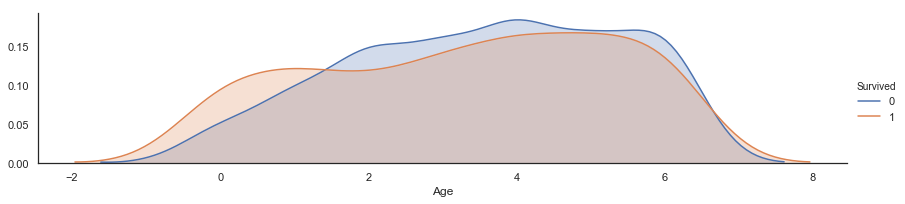

In [195]:
facet = sns.FacetGrid(train_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.add_legend()
 
plt.show() 

<b>observation</b>:

-->Here below 20 years people are more likely to survive   
-->People with age 20-35 are have chance of dying is high 
-->people with age >65 have chance of survival


<b>Why we need Name feature:-</b>

Mlle means ‘Mademoiselle’ which is the honorific used to describe someone who would be called ‘Miss’ in France

Mme means ‘Madame’ which is the honorific used to describe someone who would be called ‘Mrs’ in France

Ms is the short form for ‘Miss’

Lady, Countess, Dona are female honorifics of nobility

Don, Sir, Jonkheer are male honorifics of nobility

Capt refers to the Captain of the Titanic; Col, Major are military positions; Dr are doctors, Rev is a Reverend who all have special roles in society

Master — used to denote someone younger

Miss — young women

Mr — men

Mrs — married women

Royalty — people with fancy titles

Special — the captain, doctors and reverends who might have been called onto help during the disaster

On extracting them from the database and building a title feature we get survival rates based on each title. Looks like a lot of women survived, especially ones that were married. 


In [198]:
dat = [train_df, test_df] # combining train and test dataset

for dataset in data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

train_df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Sir           1
Don           1
Capt          1
Mme           1
Countess      1
Ms            1
Jonkheer      1
Lady          1
Name: Title, dtype: int64

In [205]:
name_mape = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 4, "Rev": 4, "Col": 4, "Major": 4, "Mlle": 4,"Countess": 4,
                 "Ms": 4, "Lady": 4, "Jonkheer": 4, "Don": 4, "Dona" : 4, "Mme": 4,"Capt": 4,"Sir": 4 }
data= [train_df,test_df]
for dataset in data:
    dataset['Title'] = dataset['Title'].map(name_mape)

In [206]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,"Braund, Mr. Owen Harris",0,2,1,0,0,0,1,0,8,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5,1,0,3,1,1,0,3,2
2,1,3,"Heikkinen, Miss. Laina",1,3,0,0,0,0,0,1,8,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,5,1,0,3,0,1,0,3,2
4,0,3,"Allen, Mr. William Henry",0,5,0,0,0,0,0,1,8,0


In [209]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,0,0,1,0,8,0
1,1,1,1,5,1,0,3,1,1,0,3,2
2,1,3,1,3,0,0,0,0,0,1,8,1
3,1,1,1,5,1,0,3,0,1,0,3,2
4,0,3,0,5,0,0,0,0,0,1,8,0


In [212]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,892,3,0,2,0,0,0,2,0,1,8,0
1,893,3,1,5,1,0,0,0,1,0,8,2
2,894,2,0,3,0,0,0,2,0,1,8,0
3,895,3,0,5,0,0,0,0,0,1,8,0
4,896,3,1,5,1,1,0,0,2,0,8,2


In [211]:
test_df =test_df.drop(["Name"],axis=1)

In [213]:
test_df =test_df.drop(["PassengerId"],axis=1)

In [214]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,3,0,2,0,0,0,2,0,1,8,0
1,3,1,5,1,0,0,0,1,0,8,2
2,2,0,3,0,0,0,2,0,1,8,0
3,3,0,5,0,0,0,0,0,1,8,0
4,3,1,5,1,1,0,0,2,0,8,2


In [215]:
train_df.to_csv("cleaned_titanic.csv")

# Building Machine learning Model

In [216]:
X_train = train_df.drop(["Survived"],axis=1)
Y_train = train_df["Survived"]
x_test = test_df

In [222]:
from sklearn import metrics
model = LogisticRegression()

model.fit(X_train,Y_train)

predc= model.predict(x_test)

log_sc = round(model.score(X_train,Y_train)*100,2)
print(log_sc)

82.04


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<b>K-Nearest Neighbor algorithm</b>



In [235]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(x_test)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(round(acc_knn,2,), "%")

85.3 %


In [ ]:
k_range = range(1,15,2)

scores = []

In [231]:
k_range = range(1,15,2)

scores = []
# We append the scores in the dictionary
for k in k_range: 
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    predic = knn.predict(x_test)
    acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
    scores.append(acc_knn)
    

print(scores)

[87.43, 85.3, 85.52, 84.85, 84.85, 84.51, 83.39]


Text(0, 0.5, 'Testing Accuracy')

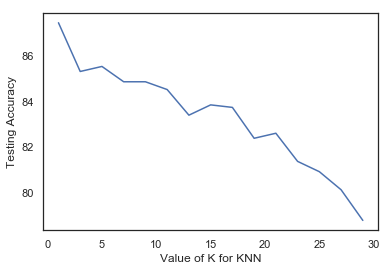

In [230]:
# plot how accuracy changes as we vary k
import matplotlib.pyplot as plt
%matplotlib inline

%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [232]:
print("max accuracy",max(scores)) # by plot u can observe that we have accuracy of 87.43 at k=2 after increasing k our model accuracy is decresing 

max accuracy 87.43


<b>K-Fold Cross validation</b>

-Fold Cross Validation randomly splits the training data into K subsets called folds. Let's image we would split our data into 4 folds (K = 4). Our random forest model would be trained and evaluated 4 times, using a different fold for evaluation everytime, while it would be trained on the remaining 3 folds.

The result of our K-Fold Cross Validation example would be an array that contains 4 different scores. We then need to compute the mean and the standard deviation for these scores.

The code below perform K-Fold Cross Validation on our KNN model, using 10 folds (K = 10). Therefore it outputs an array with 10 different scores.



In [249]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors = 3)
scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring = "accuracy")


In [250]:
print("Accuracy:", scores.mean())


Accuracy: 0.7755876177505391


You can after computing k-fold cross validation accuracy of our model is decreased by nearly 10% this is the perfect accuracy than model trained on train data set coz here we give model never seen data will processing. k-fold cross validation is best validation technique to find the accuracy

In [245]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(knn, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[463,  86],
       [115, 227]], dtype=int64)

The first row is about the not-survived-predictions: 463 passengers were correctly classified as not survived (called true negatives) and 86 where wrongly classified as not survived (false negatives).

The second row is about the survived-predictions: 155 passengers where wrongly classified as survived (false positives) and 227 where correctly classified as survived (true positives).

</b>Important note:-</b>
For completing this task i have referred some notebooks ther are

https://www.codeastar.com/data-wrangling/ 

https://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html

https://olegleyz.github.io/titanic_factors.html